In [32]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Iris (1).csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
df.describe(include="O")

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [8]:
df.shape

(150, 6)

unsupervised learning

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
std_scale=StandardScaler()
std_scale

StandardScaler()

In [18]:
df['SepalLengthCm']=std_scale.fit_transform(df[['SepalLengthCm']])
df['SepalWidthCm']=std_scale.fit_transform(df[['SepalWidthCm']])
df['PetalLengthCm']=std_scale.fit_transform(df[['PetalLengthCm']])
df['PetalWidthCm']=std_scale.fit_transform(df[['PetalWidthCm']])

In [19]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [22]:

df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


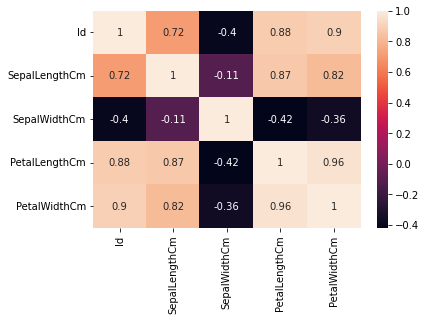

In [38]:
sns.heatmap(df.corr(),annot=True)


In [28]:
X=df.drop(["Species"],axis=1)
y=df["Species"]

clustering

In [29]:
linkage_matrix = linkage(X)

In [30]:
linkage_matrix

array([[ 80.        ,  81.        ,   1.01020733,   2.        ],
       [ 27.        ,  28.        ,   1.02799856,   2.        ],
       [ 29.        ,  30.        ,   1.03355164,   2.        ],
       [ 95.        ,  96.        ,   1.03481036,   2.        ],
       [  2.        ,   3.        ,   1.03979028,   2.        ],
       [ 39.        ,  40.        ,   1.04806916,   2.        ],
       [ 34.        ,  35.        ,   1.05575447,   2.        ],
       [ 89.        ,  90.        ,   1.05951489,   2.        ],
       [ 74.        ,  75.        ,   1.06432739,   2.        ],
       [143.        , 144.        ,   1.07252244,   2.        ],
       [140.        , 141.        ,   1.07557169,   2.        ],
       [ 26.        , 151.        ,   1.08841546,   3.        ],
       [ 32.        ,  33.        ,   1.09827185,   2.        ],
       [139.        , 160.        ,   1.10780311,   3.        ],
       [126.        , 127.        ,   1.11000211,   2.        ],
       [ 73.        , 158

NonGuiException: ignored

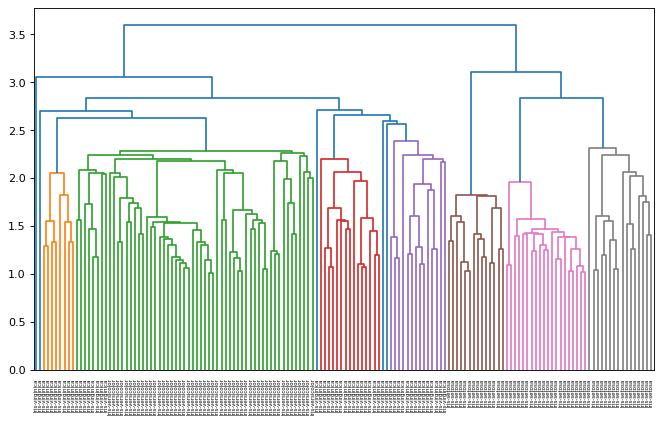

In [41]:
#dendrogram
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)

dendrogram(linkage_matrix,labels=y.values)
plt.tight_layout()
plt.show()

In [35]:
%matplotlib inline
plt.close('all')

Instantiating AgglomerativeClustering object

In [42]:
agg_clust =AgglomerativeClustering(n_clusters=6 ,affinity="euclidean" ,linkage = "ward")

Fit the hierarchical clustering and return cluster labels.

In [43]:
agg_clusters = agg_clust.fit_predict(X)

agg_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [44]:
agg_clusters = agg_clust.fit_predict(X)

In [46]:
agg_result = pd.DataFrame({"label":y, "agg_cluster" : agg_clusters} )

In [47]:
agg_result.head(20)

,label,agg_cluster
0,Iris-setosa,0
1,Iris-setosa,0
2,Iris-setosa,0
3,Iris-setosa,0
4,Iris-setosa,0
5,Iris-setosa,0
6,Iris-setosa,0
7,Iris-setosa,0
8,Iris-setosa,0
9,Iris-setosa,0


K-Means Clustering


Instantiate KMeans

In [48]:
kmeans_object = KMeans(n_clusters=5,random_state=1234)

Train

In [50]:
kmeans_object.fit(X)

KMeans(n_clusters=5, random_state=1234)

Predict

In [51]:
kmeans_clusters = kmeans_object.predict(X)

In [52]:
kmeans_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [54]:
kmeans_results = pd.DataFrame({"label":y , "kmeans_cluster" : kmeans_clusters} )
kmeans_results.head(20)

,label,kmeans_cluster
0,Iris-setosa,1
1,Iris-setosa,1
2,Iris-setosa,1
3,Iris-setosa,1
4,Iris-setosa,1
5,Iris-setosa,1
6,Iris-setosa,1
7,Iris-setosa,1
8,Iris-setosa,1
9,Iris-setosa,1


In [59]:
df1=pd.read_csv("/content/Iris (1).csv")
df1=df1.drop(["Species"],axis=1)

Inspecting cluster centroids to understand average statistics of each cluster

In [60]:
cluster_centroids = pd.DataFrame(kmeans_object.cluster_centers_,columns=df1.columns)

cluster_centroids

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,135.5,0.924915,-0.101817,0.980744,1.071066
1,15.5,-0.989538,0.916356,-1.299571,-1.251623
2,75.0,0.135109,-0.707197,0.300496,0.188360
3,105.5,0.496788,-0.456635,0.770341,0.755531
4,45.0,-0.591494,0.385725,-0.788302,-0.796152


In [62]:
#Identify right number of clusters

In [61]:
wss= {}

for k in range(1, 21):
    kmeans_loop = KMeans(n_clusters=k,n_init=30,max_iter=300,random_state=1000).fit(X)
    clusters = kmeans_loop.labels_
    wss[k] = kmeans_loop.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center

inertia_: Sum of squared distances of samples to their closest cluster center

In [63]:
wss

{1: 281837.5,
 2: 70648.9953496742,
 3: 31405.38878707857,
 4: 17826.0353409605,
 5: 11492.142367417804,
 6: 7980.644817169408,
 7: 5953.238026260755,
 8: 4615.5632965872965,
 9: 3629.610120273642,
 10: 3028.0746344896797,
 11: 2526.221919823887,
 12: 2136.3768211088136,
 13: 1860.7000692164108,
 14: 1627.9489112370857,
 15: 1442.8006510184741,
 16: 1269.5604791804733,
 17: 1153.2505426217135,
 18: 1044.9900023305831,
 19: 950.1594027985757,
 20: 866.2885086771962}

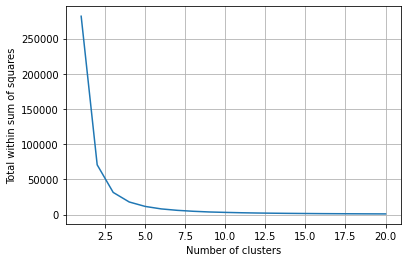

In [64]:
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Total within sum of squares')
plt.show()

In [65]:
best_kmeans = KMeans(n_clusters=8,random_state=1234)

In [66]:
best_kmeans.fit(X)

KMeans(random_state=1234)

In [67]:
best_kmeans_labels = best_kmeans.predict(X)
best_kmeans_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [70]:
#Add Cluster Labels to Original Data

In [72]:
final_cluster_data = pd.concat([df1,kmeans_results],axis=1)

In [73]:
analysis = final_cluster_data.groupby(['kmeans_cluster']).mean().reset_index()
analysis

,kmeans_cluster,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,135.5,6.606667,3.010000,5.483333,2.013333
1,1,15.5,5.026667,3.450000,1.473333,0.246667
2,2,75.0,5.954839,2.748387,4.287097,1.341935
3,3,105.5,6.253333,2.856667,5.113333,1.773333
4,4,45.0,5.355172,3.220690,2.372414,0.593103


In [74]:
analysis.drop(["Id"],axis=1)

,kmeans_cluster,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,6.606667,3.010000,5.483333,2.013333
1,1,5.026667,3.450000,1.473333,0.246667
2,2,5.954839,2.748387,4.287097,1.341935
3,3,6.253333,2.856667,5.113333,1.773333
4,4,5.355172,3.220690,2.372414,0.593103


#This concludes my K-Means Workshop(Task 2 from workshop is finished)